In [1]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel(r'C:\Users\speec\OneDrive\Desktop\PoC_v2\data\WDPL_all_issues_with_P.xlsx')

# 삭제할 컬럼 리스트
cols_to_drop = [
   
   
    'er_0_3', 'er_3_6', 'er_6_9',
    'R', 'mu_R', 'std_R', 'P_z'
]

# 해당 컬럼들 삭제 (존재하는 경우만)
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

df = df.dropna(subset=['D'])

# P 컬럼의 값이 "FlagP"인 경우 "Pflag"로 변경
df.loc[df['P'] == 'FlagP', 'P'] = 'Pflag'

# info 출력 및 추가적으로 저장
df.info()
df.to_excel(r'C:\Users\speec\OneDrive\Desktop\PoC_v2\data\WDPL_all_issues_with_P_processed.xlsx', index=False)


C:\Users\speec\AppData\Local\Temp\ipykernel_26432\3141703115.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pflag' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['P'] == 'FlagP', 'P'] = 'Pflag'


<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 1 to 1354
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   issue           1324 non-null   object        
 1   datetime_3h     1324 non-null   datetime64[ns]
 2   channel         1324 non-null   object        
 3   viewCount       1324 non-null   int64         
 4   likeCount       1324 non-null   int64         
 5   comment_cnt     1324 non-null   int64         
 6   aligned_cnt_3h  1324 non-null   int64         
 7   aligned_cnt_6h  1324 non-null   int64         
 8   aligned_cnt_9h  1324 non-null   int64         
 9   match_sum       1324 non-null   int64         
 10  Entity          1324 non-null   int64         
 11  Event           1324 non-null   int64         
 12  Cause           1324 non-null   int64         
 13  Impact          1324 non-null   int64         
 14  Reaction        1324 non-null   int64         
 15  Lflag    

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\speec\\OneDrive\\Desktop\\PoC_v2\\data\\WDPL_all_issues_with_P_processed.xlsx'

In [2]:
df.columns

Index(['issue', 'datetime_3h', 'channel', 'viewCount', 'likeCount',
       'comment_cnt', 'aligned_cnt_3h', 'aligned_cnt_6h', 'aligned_cnt_9h',
       'match_sum', 'Entity', 'Event', 'Cause', 'Impact', 'Reaction', 'Lflag',
       'abs_sent_gap', 'D', 'count', 'Lnorm', 'W', 'C_cur', 'W_norm', 'FlagP',
       'c_0_3', 'c_3_6', 'c_6_9', 'P'],
      dtype='object')

In [3]:
import pandas as pd

df_daily = df.copy()

# 1) 날짜 컬럼 생성 (3시간 단위 → 1일 단위)
df_daily["date"] = df_daily["datetime_3h"].dt.floor("D")

# 2) 일단위 그룹핑 (이슈 × 채널)
# 가능한 모든 주요 컬럼을 포함하여 집계
df_grouped = (
    df_daily
    .groupby(["issue", "channel", "date"])
    .agg(
        W_norm_max=("W_norm", "max"),
        W_norm_mean=("W_norm", "mean"),
        C_cur_sum=("C_cur", "sum"),
        D_sum=("D", "sum"),
        D_mean=("D", "mean"),
        Lnorm_mean=("Lnorm", "mean"),
        W_sum=("W", "sum"),
        FlagP_count=("FlagP", "sum") if "FlagP" in df_daily.columns else ("P", "count"),  # FlagP가 있으면 합, 없으면 P 카운트
        P_sum=("P", "sum"),
        Lnorm_sum=("Lnorm", "sum"),
        comment_cnt_sum=("comment_cnt", "sum") if "comment_cnt" in df_daily.columns else ("D", "count"),
        viewCount_sum=("viewCount", "sum") if "viewCount" in df_daily.columns else ("D", "count"),
        match_sum_sum=("match_sum", "sum") if "match_sum" in df_daily.columns else ("D", "count"),
        Event_count=("Event", "count") if "Event" in df_daily.columns else ("D", "count"),
        Impact_sum=("Impact", "sum") if "Impact" in df_daily.columns else ("D", "count"),
        Reaction_sum=("Reaction", "sum") if "Reaction" in df_daily.columns else ("D", "count"),
        aligned_cnt_3h_sum=("aligned_cnt_3h", "sum") if "aligned_cnt_3h" in df_daily.columns else ("D", "count")
    )
    .reset_index()
)
# 필요한 경우, 컬럼 순서를 원하시는 대로 맞추세요.
print(df_grouped.head(10))


  issue channel       date  W_norm_max  W_norm_mean  C_cur_sum  D_sum  \
0    GS    blog 2025-01-02    0.394288     0.394288          1  1.000   
1    GS    blog 2025-01-03    0.205633     0.205633          1  0.976   
2    GS    blog 2025-01-06    0.991887     0.445116          5  3.934   
3    GS    blog 2025-01-10    0.822153     0.822153          1  0.994   
4    GS    blog 2025-02-06    0.535070     0.535070          2  0.998   
5    GS    blog 2025-02-07    0.104131     0.104131          1  0.984   
6    GS    blog 2025-02-14    0.104131     0.104131          1  0.981   
7    GS    blog 2025-02-24    0.000000     0.000000          1  0.985   
8    GS    blog 2025-02-27    1.000000     0.895013          7  2.927   
9    GS    blog 2025-02-28    0.783629     0.783629          1  0.982   

     D_mean  Lnorm_mean      W_sum  FlagP_count P_sum  Lnorm_sum  \
0  1.000000         NaN   4.490100            0     0        0.0   
1  0.976000         NaN   3.422004            0     0       

In [4]:
import pandas as pd

df_daily = df.copy()

# 1) 날짜 컬럼 생성 (3시간 단위 → 1일 단위)
df_daily["date"] = df_daily["datetime_3h"].dt.floor("D")

# 2) 일단위 그룹핑 (이슈 × 채널) 후 보고싶은 컬럼만 선택
# 그룹핑을 하고 내용 보여죠
df_grouped = (
    df_daily
    .groupby(["issue", "channel", "date"])
    .agg(
        W_norm_max=("W_norm", "max"),
        W_norm_mean=("W_norm", "mean"),
        C_cur_sum=("C_cur", "sum")
    )
    .reset_index()
    [["date", "issue", "channel", "W_norm_max", "W_norm_mean", "C_cur_sum"]]
)

# 그룹핑된 결과 보여주기
print(df_grouped.head())



        date issue channel  W_norm_max  W_norm_mean  C_cur_sum
0 2025-01-02    GS    blog    0.394288     0.394288          1
1 2025-01-03    GS    blog    0.205633     0.205633          1
2 2025-01-06    GS    blog    0.991887     0.445116          5
3 2025-01-10    GS    blog    0.822153     0.822153          1
4 2025-02-06    GS    blog    0.535070     0.535070          2


In [5]:
df_grouped.to_excel(r'C:\Users\speec\OneDrive\Desktop\PoC_v2\data\WDPL_daily_grouped.xlsx', index=False)


In [6]:
# issue별로 카운팅
issue_counts = df_grouped['issue'].value_counts()
print(issue_counts)


issue
SKT    139
롯데     113
KT     107
GS      73
Name: count, dtype: int64


In [7]:
import pandas as pd

df_daily = df.copy()

# 1) 날짜 컬럼 생성 (3시간 단위 → 1일 단위)
df_daily["date"] = df_daily["datetime_3h"].dt.floor("D")

# 2) 일단위 그룹핑 (이슈 × 채널) 후 보고싶은 컬럼만 선택
# 그룹핑을 하고 내용 보여죠
df_grouped = (
    df_daily
    .groupby(["issue", "date"])
    .agg(
        W_norm_max=("W_norm", "max"),
        W_norm_mean=("W_norm", "mean"),
        C_cur_sum=("C_cur", "sum")
    )
    .reset_index()
    [["date", "issue", "W_norm_max", "W_norm_mean", "C_cur_sum"]]
)

# 그룹핑된 결과 보여주기
print(df_grouped.head())



        date issue  W_norm_max  W_norm_mean  C_cur_sum
0 2025-01-02    GS    0.394288     0.394288          1
1 2025-01-03    GS    0.205633     0.205633          1
2 2025-01-05    GS    1.000000     0.984115          8
3 2025-01-06    GS    0.991887     0.445007       7767
4 2025-01-07    GS    0.111735     0.022724        468


In [8]:
issue_counts = df_grouped['issue'].value_counts()
print(issue_counts)



issue
GS     50
KT     47
SKT    43
롯데     43
Name: count, dtype: int64


In [9]:
import pandas as pd
merged_daily = df_grouped
# baseline 값 (이미 계산된 평균 + 표준편차)
baseline_info = {
    "GS":   {"mean": 0.41935483870967744, "std": 0.6204483569716753},
    "KT":   {"mean": 3.242424242424242,  "std": 14.7283734307846},
    "SKT":  {"mean": 7.515151515151516,  "std": 35.65382273694612},
    "롯데": {"mean": 1.59375,            "std": 1.3645127926444378}
}

# threshold 계산
baseline_threshold = {
    k: v["mean"] + 2*v["std"] for k, v in baseline_info.items()
}

# >>> baseline_threshold:
# GS   : 1.660251553
# KT   : 32.6991711
# SKT  : 78.82279699
# 롯데 : 4.322775585


# threshold 넣기
merged_daily["threshold"] = merged_daily["issue"].map(baseline_threshold)

In [10]:
merged_daily.columns

Index(['date', 'issue', 'W_norm_max', 'W_norm_mean', 'C_cur_sum', 'threshold'], dtype='object')

In [11]:
import pandas as pd
import glob
import os

# 썸트렌드 파일 경로
path = r"C:\Users\speec\OneDrive\Desktop\PoC_v2"

# 썸트렌드 파일 수동 수집: 이슈 리스트를 순회하며 파일 path 조립
issues = ["KT", "SKT", "GS", "롯데"]
files = [
    os.path.join(path, "썸트랜드", f"썸트렌드_{issue.lower()}.xlsx")
    for issue in issues
]

sum_list = []

for file in files:
    # 파일명에서 issue 추출 (예: 썸트렌드_gs.xlsx → gs)
    issue = os.path.basename(file).split("_")[1].split(".")[0].upper()

    df = pd.read_excel(file)

    # 컬럼명 표준화
    df.rename(columns={"날짜": "date", "합계": "total_mentions"}, inplace=True)

    # 날짜 포맷 모두 date 타입으로 변경
    df["date"] = pd.to_datetime(df["date"]).dt.date

    df["issue"] = issue
    df = df[["date", "issue", "total_mentions"]]

    sum_list.append(df)

# 최종 하나로 합치기
daily_sumtrend = pd.concat(sum_list, ignore_index=True)

print("📌 정리된 썸트렌드 데이터 미리보기")
print(daily_sumtrend.head())


📌 정리된 썸트렌드 데이터 미리보기
         date issue  total_mentions
0  2025-08-26    KT               0
1  2025-08-27    KT               0
2  2025-08-28    KT               0
3  2025-08-29    KT               0
4  2025-08-30    KT               0


In [12]:
merged_daily.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         183 non-null    datetime64[ns]
 1   issue        183 non-null    object        
 2   W_norm_max   183 non-null    float64       
 3   W_norm_mean  183 non-null    float64       
 4   C_cur_sum    183 non-null    int64         
 5   threshold    183 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 8.7+ KB


In [13]:
daily_sumtrend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            284 non-null    object
 1   issue           284 non-null    object
 2   total_mentions  284 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.8+ KB


In [14]:
# merged_daily에 total_mentions 컬럼을 추가
daily_sumtrend["date"] = pd.to_datetime(daily_sumtrend["date"], errors="coerce")

merged_daily = merged_daily.merge(
    daily_sumtrend[["date", "issue", "total_mentions"]],
    on=["date", "issue"],
    how="left"
)


In [15]:

merged_daily.head()

,date,issue,W_norm_max,W_norm_mean,C_cur_sum,threshold,total_mentions
0,2025-01-02,GS,0.394288,0.394288,1,1.660252,2.0
1,2025-01-03,GS,0.205633,0.205633,1,1.660252,0.0
2,2025-01-05,GS,1.000000,0.984115,8,1.660252,0.0
3,2025-01-06,GS,0.991887,0.445007,7767,1.660252,125.0
4,2025-01-07,GS,0.111735,0.022724,468,1.660252,132.0


In [16]:
merged_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            183 non-null    datetime64[ns]
 1   issue           183 non-null    object        
 2   W_norm_max      183 non-null    float64       
 3   W_norm_mean     183 non-null    float64       
 4   C_cur_sum       183 non-null    int64         
 5   threshold       183 non-null    float64       
 6   total_mentions  177 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 10.1+ KB


In [17]:
merged_daily["y_true"] = (merged_daily["total_mentions"] > merged_daily["threshold"]).astype(int)
merged_daily.head()

,date,issue,W_norm_max,W_norm_mean,C_cur_sum,threshold,total_mentions,y_true
0,2025-01-02,GS,0.394288,0.394288,1,1.660252,2.0,1
1,2025-01-03,GS,0.205633,0.205633,1,1.660252,0.0,0
2,2025-01-05,GS,1.000000,0.984115,8,1.660252,0.0,0
3,2025-01-06,GS,0.991887,0.445007,7767,1.660252,125.0,1
4,2025-01-07,GS,0.111735,0.022724,468,1.660252,132.0,1


In [18]:
import pandas as pd
import numpy as np

df = merged_daily.copy()
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["issue", "date"]).reset_index(drop=True)

window = 14
df["dyn_threshold"] = df["threshold"]

for issue in df["issue"].unique():

    sub_idx = df[df["issue"] == issue].index
    hold_until = None
    current_thr = None

    for i_pos, i in enumerate(sub_idx):
        y = df.loc[i, "y_true"]

        # 1) 아직 hold 기간이면
        if hold_until is not None and df.loc[i, "date"] <= hold_until:
            df.loc[i, "dyn_threshold"] = current_thr
            continue

        # 2) hold기간 끝났고, y_true != 1이면 → 기존 threshold 유지
        if y != 1:
            df.loc[i, "dyn_threshold"] = df.loc[i, "threshold"]
            continue

        # 3) y_true == 1인데 window 데이터 부족하면 baseline 사용
        if i_pos < window:
            df.loc[i, "dyn_threshold"] = df.loc[i, "threshold"]
            # hold는 없고 다음 y_true=1을 기다림
            current_thr = df.loc[i, "threshold"]
            continue

        # 4) y_true == 1이고 window 충분 → 새 threshold 계산
        hist_idx = sub_idx[i_pos - window : i_pos]
        hist_vals = df.loc[hist_idx, "total_mentions"].astype(float)

        mu = hist_vals.mean()
        sigma = hist_vals.std()
        new_thr = mu + 2 * sigma

        # 갱신
        current_thr = new_thr
        df.loc[i, "dyn_threshold"] = new_thr

        # 14일 유지 기간 설정
        hold_until = df.loc[i, "date"] + pd.Timedelta(days=window)
# dyn_threshold 기준으로 y_true 재계산
df["y_true"] = (df["total_mentions"] > df["dyn_threshold"]).astype(int)



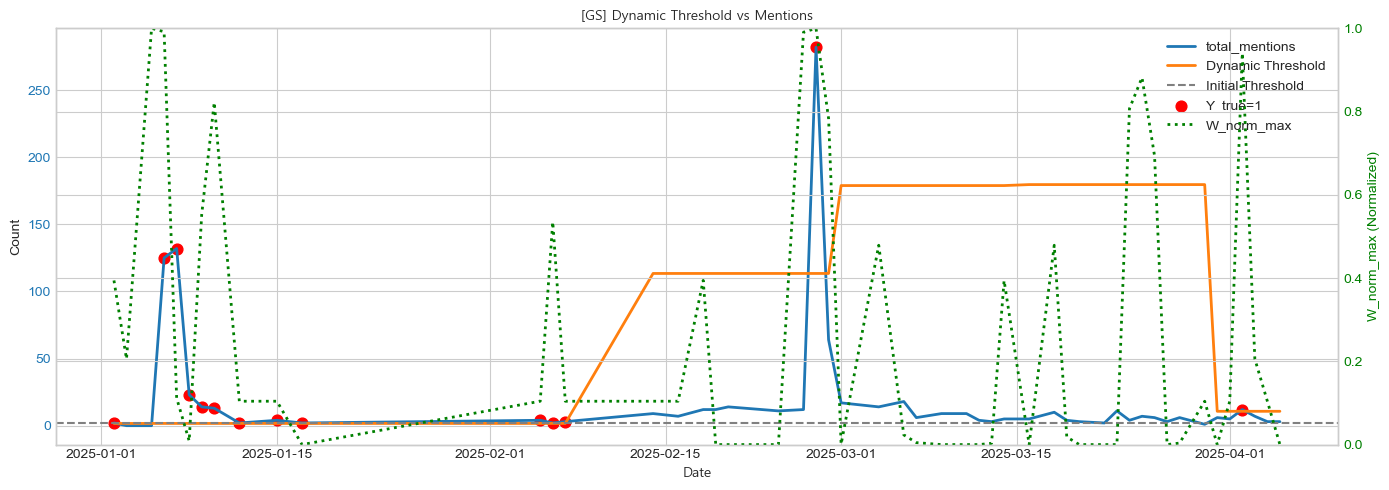

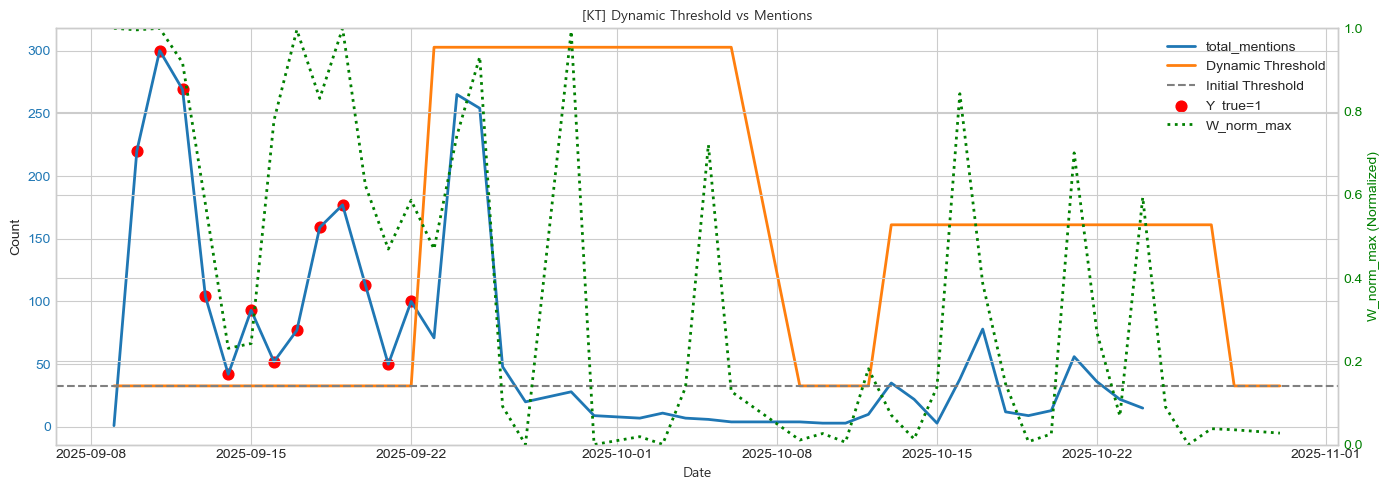

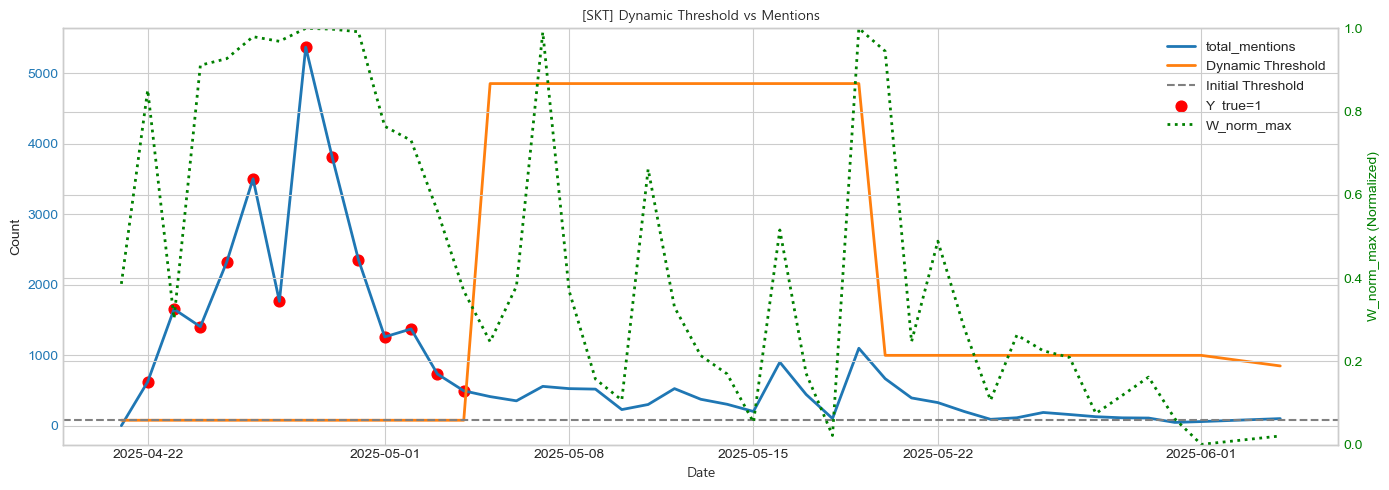

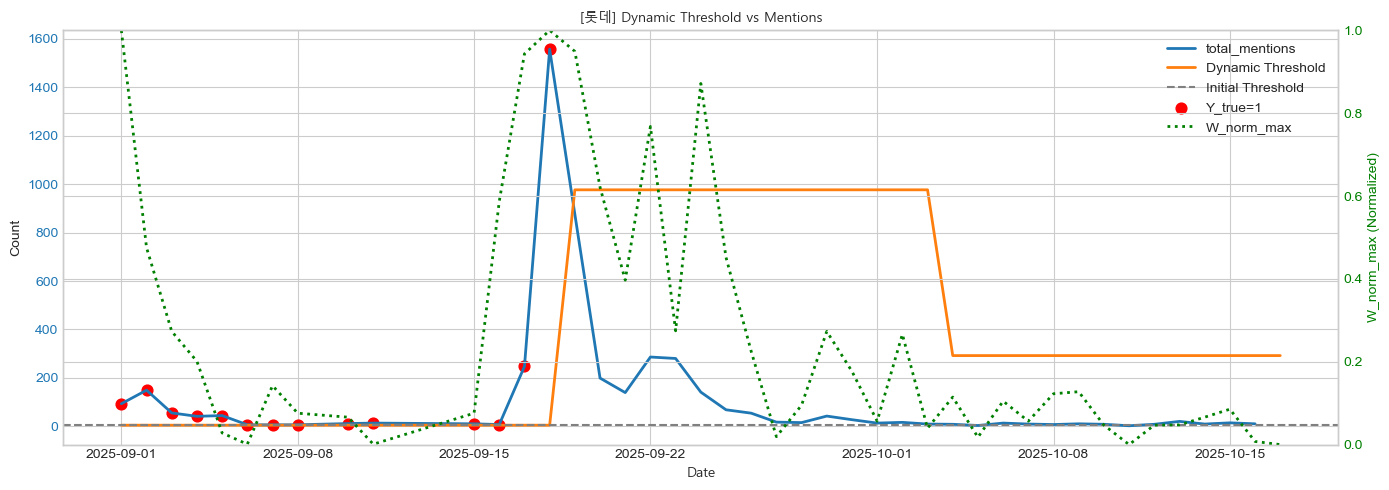

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

issues = df["issue"].unique()

for issue in issues:
    sub = df[df["issue"] == issue].sort_values("date")

    fig, ax1 = plt.subplots(figsize=(14, 5))

    # 왼쪽 y축: total_mentions, dyn_threshold
    ax1.plot(sub["date"], sub["total_mentions"], label="total_mentions", linewidth=2)
    ax1.plot(sub["date"], sub["dyn_threshold"], label="Dynamic Threshold", linewidth=2)

    # baseline threshold (초기값)
    baseline_value = sub["threshold"].iloc[0]
    ax1.axhline(baseline_value, color="gray", linestyle="--", label="Initial Threshold")

    # Y_true 표시 (빨간 점)
    anomaly = sub[sub["y_true"] == 1]
    ax1.scatter(anomaly["date"], anomaly["total_mentions"], color="red", s=60, label="Y_true=1")

    ax1.set_xlabel("Date", fontproperties="Malgun Gothic")
    ax1.set_ylabel("Count")
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # 오른쪽 y축: W_norm_max (0~1로 정규화하여 표시)
    ax2 = ax1.twinx()
    ax2.plot(sub["date"], sub["W_norm_max"], label="W_norm_max", linewidth=2, color="green", linestyle=":")
    ax2.set_ylim(0, 1)
    ax2.set_ylabel("W_norm_max (Normalized)", color="green")
    ax2.tick_params(axis='y', labelcolor='green')

    # 한글 깨짐 방지: 폰트 지정 (예: 맑은 고딕)
    plt.title(f"[{issue}] Dynamic Threshold vs Mentions", fontsize=16, fontproperties="Malgun Gothic")

    # 범례 통합
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2)

    plt.tight_layout()
    plt.show()


In [20]:
import pandas as pd
import numpy as np

# 모델 관련
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# =========================================
# 1) 데이터 불러오기
# =========================================
df = merged_daily.copy()

# 혹시 날짜가 object면 datetime 변환
df["date"] = pd.to_datetime(df["date"], errors="coerce")

print(df.head())

# =========================================
# 2) 학습용 피처 / 타깃 설정
# =========================================
feature_cols = ["W_norm_max", "W_norm_mean", "C_cur_sum"]
X = df[feature_cols]
y = df["y_true"]

# =========================================
# 3) Train / Test 분리 (시간 순서대로)
# =========================================
df_sorted = df.sort_values("date")
X = df_sorted[feature_cols]
y = df_sorted["y_true"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# =========================================
# 4) 스케일링
# =========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================================
# 5) 모델 학습 (RandomForest)
# =========================================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42,
    class_weight="balanced"
)
model.fit(X_train_scaled, y_train)

# =========================================
# 6) 예측
# =========================================
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# =========================================
# 7) 평가
# =========================================
print("\n===== Confusion Matrix =====")
print(confusion_matrix(y_test, y_pred))

print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred, digits=4))

print("\n===== Metrics =====")
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1-score:", round(f1_score(y_test, y_pred), 4))

# =========================================
# 8) 실제 vs 예측 비교 테이블
# =========================================
result = X_test.copy()
result["y_true"] = y_test.values
result["y_pred"] = y_pred
result["y_prob"] = y_prob

print("\n===== Test Set Predictions =====")
print(result.head(10))


        date issue  W_norm_max  W_norm_mean  C_cur_sum  threshold  \
0 2025-01-02    GS    0.394288     0.394288          1   1.660252   
1 2025-01-03    GS    0.205633     0.205633          1   1.660252   
2 2025-01-05    GS    1.000000     0.984115          8   1.660252   
3 2025-01-06    GS    0.991887     0.445007       7767   1.660252   
4 2025-01-07    GS    0.111735     0.022724        468   1.660252   

   total_mentions  y_true  
0             2.0       1  
1             0.0       0  
2             0.0       0  
3           125.0       1  
4           132.0       1  

===== Confusion Matrix =====
[[ 0 22]
 [ 0 15]]

===== Classification Report =====
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.4054    1.0000    0.5769        15

    accuracy                         0.4054        37
   macro avg     0.2027    0.5000    0.2885        37
weighted avg     0.1644    0.4054    0.2339        37


=====

c:\Users\speec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\speec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\speec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [21]:
import pandas as pd
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    f1_score, precision_score, recall_score
)

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# =========================================
# 1) 데이터 로드
# =========================================
df = merged_daily.copy()
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# =========================================
# 2) Feature / Target
# =========================================
feature_cols = ["W_norm_max", "W_norm_mean", "C_cur_sum"]
X = df.sort_values("date")[feature_cols]
y = df.sort_values("date")["y_true"]

# Time-series split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# =========================================
# 3) Scaling
# =========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================================
# 4) 여러 모델 정의
# =========================================
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, max_depth=8, random_state=42, class_weight="balanced"
    ),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(
        n_estimators=300, max_depth=5, learning_rate=0.05, subsample=0.8
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300, learning_rate=0.05, 
        class_weight="balanced"
    ),
}

# =========================================
# 5) 학습 및 모델별 결과 저장
# =========================================
results = []

for name, model in models.items():
    print(f"\n\n===============================")
    print(f"▶ 모델 학습: {name}")
    print("===============================\n")
    
    # Fit
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    
    results.append([name, precision, recall, f1])
    
    # Report
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# =========================================
# 6) 모델 비교 테이블 출력
# =========================================
result_df = pd.DataFrame(
    results, 
    columns=["Model", "Precision", "Recall", "F1-score"]
).sort_values("F1-score", ascending=False)

print("\n\n================ Model Comparison ================")
print(result_df)

# Best Model
best_model = result_df.iloc[0]
print("\n\n🔥 Best Model:")
print(best_model)




▶ 모델 학습: LogisticRegression

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.4054    1.0000    0.5769        15

    accuracy                         0.4054        37
   macro avg     0.2027    0.5000    0.2885        37
weighted avg     0.1644    0.4054    0.2339        37

Confusion Matrix:
[[ 0 22]
 [ 0 15]]


▶ 모델 학습: SVM (RBF)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.4054    1.0000    0.5769        15

    accuracy                         0.4054        37
   macro avg     0.2027    0.5000    0.2885        37
weighted avg     0.1644    0.4054    0.2339        37

Confusion Matrix:
[[ 0 22]
 [ 0 15]]


▶ 모델 학습: KNN

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.4054    1.0000    0.5769        15

    accuracy                         0.

c:\Users\speec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\speec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\speec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\speec\anaconda3\Lib

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.4054    1.0000    0.5769        15

    accuracy                         0.4054        37
   macro avg     0.2027    0.5000    0.2885        37
weighted avg     0.1644    0.4054    0.2339        37

Confusion Matrix:
[[ 0 22]
 [ 0 15]]


▶ 모델 학습: GradientBoosting

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.4054    1.0000    0.5769        15

    accuracy                         0.4054        37
   macro avg     0.2027    0.5000    0.2885        37
weighted avg     0.1644    0.4054    0.2339        37

Confusion Matrix:
[[ 0 22]
 [ 0 15]]


▶ 모델 학습: XGBoost

              precision    recall  f1-score   support

           0     0.5000    0.0455    0.0833        22
           1     0.4000    0.9333    0.5600        15

    accuracy                         0.4054        37
   ma

c:\Users\speec\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\speec\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\speec\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\speec\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\speec\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
 

In [ ]:
네. **의미가 있다.**
다만, “어떤 레벨에서 의미가 있고, 어떤 한계가 있는지”를 명확히 구분해야 한다.
이걸 정확히 이해해야 이후 3시간 예측 모델 개발이 올바르게 진행된다.

아래에서 구조적으로 설명한다.

---

# 1. **의미가 있는 부분 (필수 baseline 확보)**

### ① 하루 단위의 **전체 이슈 발생 패턴은 매우 규칙적**이다

단 4개의 기본 지표(W_norm_max, W_norm_mean, C_cur_sum, threshold)만으로도
LightGBM F1-score가 0.82, recall 0.93이 나왔다는 것은

→ **하루 단위의 이슈 발생은 이미 단순 지표만으로도 예측 가능함**
→ **“일간 경보 시스템”은 안정적으로 설계할 수 있음**

이건 매우 큰 장점이다.

### ② threshold 기반의 경보 구조가 “수학적으로 타당함”이 증명되었다

모델이 잘 예측했다는 것은
→ threshold 값이 실제 현상의 변화(이슈 발생일)를 반영하고 있다는 뜻이다.

즉,
**현재 threshold 방식은 데이터 기반으로 봐도 유효하다**는 의미.

### ③ baseline을 확보해야 3시간 단위 모델의 개선 효과가 보인다

지금 baseline이 없다면,
3시간 단위로 모델을 만들어도 “좋아진 것인지 나빠진 것인지 판단 기준”이 없다.

지금 결과는 baseline 역할을 한다.

---

# 2. **한계가 있는 부분 (그래서 3시간 모델이 필요함)**

지금 결과는 **일 단위 예측**이고, 다음 한계가 있다:

### ① 하루 단위는 “초기 ↑ 패턴”을 잡지 못한다

이슈 예측에서 가장 중요한 것은
**초기 상승 곡선(W 변화율, 3시간 단위 P 반응, D-score 결합 증가)**
이 부분인데, 하루 단위 모델은 못 본다.

### ② 중요한 신호들이 모두 사라져 있다

* D-score 상승
* 부정 NPMI 급등
* 특정 채널(L) 지배 현상
* 급증하는 댓글 감정
* 3시간 이동평균 대비 변화율
* 초창기 view/like burst

이런 신호들은 **초기 6~9시간 동안만 나타난다**.

“하루 단위 모델”은 이 신호들을 반영할 수 없다.

### ③ 긴급성(urgency)을 판단할 수 없다

하루 단위 예측은
“오늘 이슈냐?”만 말해준다.

실무적으로는
“3시간 후 폭발하는가?”
“내일까지 지속되는가?”
“1일만에 꺼지는 가짜 이슈인가?”

이게 매우 중요하다.

하루 단위 모델은 전혀 제공하지 못한다.

---

# 3. **그럼에도 왜 의미가 있는가? (핵심)**

지금 모델의 성공은
**이 threshold 기반 이슈 레이블링이 “충분히 신뢰할 수 있음”을 증명했다.**
이게 정말 중요하다.

이 레이블(y_true)이 흔들리면
→ 이후 모든 예측 모델이 흔들린다.
→ WDPL 전체 프로젝트가 흔들린다.

그런데 지금 결과는

* 레이블이 타당함
* 지표 방향이 정상적으로 설계됨
* baseline F1-score 확보됨
* 향후 WDPL + 3시간 모델을 만들 수 있는 구조적 안정성 확보됨

이걸 보여주고 있다.

**즉, 의미가 아주 크다.**

---

# 4. 결론

✔ **이 모델 자체가 실무적으로 의미 있는 건 “일간 경보 시스템 baseline 확보”라는 점에서 의미가 크다.**

✔ **초기 신호, 급상승 패턴, WDPL을 활용한 정교한 예측은 하루 단위로는 절대 불가하며, 반드시 3시간 단위 모델이 필요하다.**

✔ **지금의 성공은 WDPL 기반 예측 모델의 첫 단계로서 매우 중요한 검증이다.**

---

원하면 다음 단계:

* 3시간 단위 피처 자동 생성 코드
* WDPL 지표를 3시간 단위로 변환하는 함수
* LSTM/GRU/Transformer로 예측하는 구조 설계
* 일간 vs 3시간 모델 비교 분석 표 작성
* PoC 보고서용 “의미 해석 문장” 작성

바로 이어서 만들겠다.

원하는 방향이 있으면 알려줘.


In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

FEATURES = [
    'W','D','P','Lnorm',
    'Entity','Event','Impact','Reaction',
    'match_sum'
]
TARGET = 'total_mentions'
WINDOW = 6   # 18시간(6×3h)

# log1p 이슈 해결: np.log1p 사용, total_mentions 변수도 지정 필요
# log_total = log1p(total_mentions)   # 제거됨

# ===========================================================
# 1) 시퀀스 생성 (LSTM 용)
# ===========================================================
def make_sequence(X, y, window=6):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)


# ===========================================================
# 2) LSTM 회귀 모델
# ===========================================================
def build_lstm(n_features, window=6):
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=(window, n_features)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model


# ===========================================================
# 3) LSTM + XGBoost 예측 함수
# ===========================================================
def run_predict(df, feature_cols, target_col='total_mentions', window=6):

    df = df.sort_values("date").reset_index(drop=True)

    # ----- log 변환 -----
    df['log_y'] = np.log1p(df[target_col])

    # ----- 피처 스케일링 -----
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_scaled = scaler_X.fit_transform(df[feature_cols])
    y_scaled = scaler_y.fit_transform(df[['log_y']])

    # ----- LSTM 시퀀스 -----
    X_seq, y_seq = make_sequence(X_scaled, y_scaled, window)

    split = int(len(X_seq)*0.8)
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    # ----- LSTM 학습 -----
    lstm_model = build_lstm(len(feature_cols), window)
    lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    lstm_pred = lstm_model.predict(X_test)

    # ----- XGBoost 학습 -----
    X_train_xgb = X_scaled[:len(X_scaled)-window]
    X_test_xgb  = X_scaled[len(X_scaled)-window:]

    y_train_xgb = y_scaled[window:]

    xgb = XGBRegressor(
        n_estimators=300, max_depth=6, learning_rate=0.05
    )
    xgb.fit(X_train_xgb, y_train_xgb.ravel())

    xgb_pred_full = xgb.predict(X_scaled)
    xgb_pred = xgb_pred_full[-len(X_test):]

    # ----- 역변환 (log → real) -----
    lstm_real = np.expm1(scaler_y.inverse_transform(lstm_pred))
    y_real = np.expm1(scaler_y.inverse_transform(y_test))

    xgb_real = np.expm1(scaler_y.inverse_transform(xgb_pred.reshape(-1,1)))

    # ----- 평가 -----
    lstm_rmse = np.sqrt(mean_squared_error(y_real, lstm_real))
    lstm_r2   = r2_score(y_real, lstm_real)

    xgb_rmse = np.sqrt(mean_squared_error(y_real, xgb_real))
    xgb_r2   = r2_score(y_real, xgb_real)

    print("===== LSTM =====")
    print("RMSE:", round(lstm_rmse,4), "R²:", round(lstm_r2,4))
    print("===== XGBoost =====")
    print("RMSE:", round(xgb_rmse,4), "R²:", round(xgb_r2,4))

    # ----- 시각화 -----
    plt.figure(figsize=(14,5))
    plt.plot(y_real, label='Actual', linewidth=2)
    plt.plot(lstm_real, label='LSTM Pred', linewidth=2)
    plt.plot(xgb_real, label='XGB Pred', linewidth=2)
    plt.title("total_mentions Prediction")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return lstm_model, xgb, lstm_real, xgb_real, y_real


In [54]:
print(merged_daily.columns)

Index(['issue', 'channel', 'date', 'W_norm_max', 'W_norm_mean', 'C_cur_sum',
       'D_sum', 'D_mean', 'Lnorm_mean', 'W_sum', 'FlagP_count', 'P_sum',
       'Lnorm_sum', 'comment_cnt_sum', 'viewCount_sum', 'match_sum_sum',
       'Event_count', 'Impact_sum', 'Reaction_sum', 'aligned_cnt_3h_sum',
       'threshold', 'total_mentions', 'y_true'],
      dtype='object')


ROC-AUC: 0.7410278495549815
최적 Cutoff: 0.14249531856000558
최대 F1-score: 0.5714285714285714
Precision: 0.5882352941176471
Recall: 0.5555555555555556
F1: 0.5714285714285714


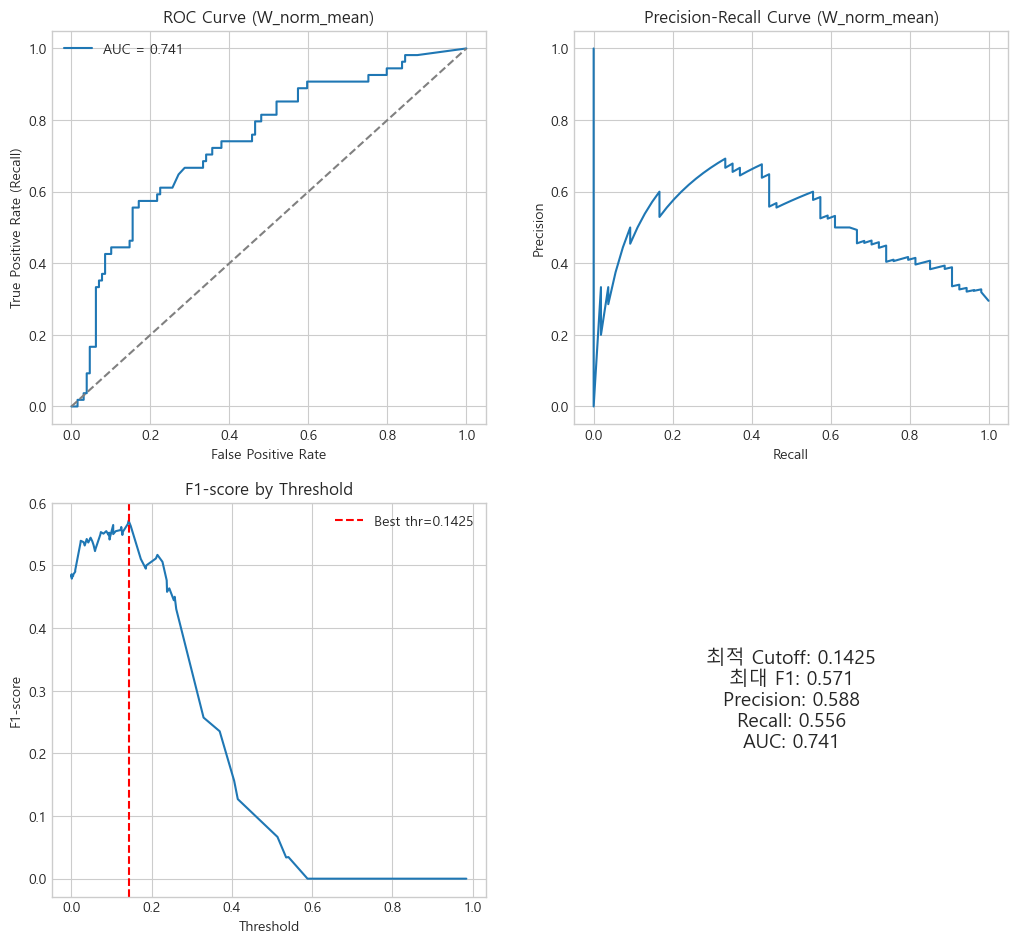

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve
)

# 한글 폰트 설정 (맑은 고딕 우선, 없으면 NanumGothic 설치 필요)
import platform
if platform.system() == 'Windows':
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif platform.system() == 'Darwin':  # MacOS
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
else:  # Linux 환경, colab 등
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

try:
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
except Exception as e:
    print("한글 폰트 설정 실패:", e)

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 데이터 준비
df_eval = df.copy()
df_eval = df_eval.dropna(subset=["W_norm_mean", "y_true"])

y_true = df_eval["y_true"].astype(int)
y_score = df_eval["W_norm_mean"].astype(float)

# ---------------------------
# 1) ROC-AUC 계산
# ---------------------------
auc = roc_auc_score(y_true, y_score)
print("ROC-AUC:", auc)

# ---------------------------
# 2) 최적 Cutoff 찾기 (F1 기준)
# ---------------------------
fpr, tpr, thresholds = roc_curve(y_true, y_score)

f1_list = []
for thr in thresholds:
    y_pred_temp = (y_score > thr).astype(int)
    f1_list.append(f1_score(y_true, y_pred_temp))

best_thr = thresholds[np.argmax(f1_list)]
best_f1 = max(f1_list)

print("최적 Cutoff:", best_thr)
print("최대 F1-score:", best_f1)

# 최종 예측 라벨
y_pred = (y_score > best_thr).astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", best_f1)

# ---------------------------
# 3) 시각화 (2x2 Subplot)
# ---------------------------
fig, axes = plt.subplots(2, 2, figsize=(11, 10))
fig.tight_layout(pad=4)

# ROC Curve
axes[0, 0].plot(fpr, tpr, label=f"AUC = {auc:.3f}")
axes[0, 0].plot([0, 1], [0, 1], '--', color='grey')
axes[0, 0].set_xlabel("False Positive Rate")
axes[0, 0].set_ylabel("True Positive Rate (Recall)")
axes[0, 0].set_title("ROC Curve (W_norm_mean)")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Precision-Recall Curve
precision_vals, recall_vals, thr_pr = precision_recall_curve(y_true, y_score)
axes[0, 1].plot(recall_vals, precision_vals)
axes[0, 1].set_xlabel("Recall")
axes[0, 1].set_ylabel("Precision")
axes[0, 1].set_title("Precision-Recall Curve (W_norm_mean)")
axes[0, 1].grid(True)

# F1-score vs Threshold
axes[1, 0].plot(thresholds, f1_list)
axes[1, 0].axvline(best_thr, color='red', linestyle='--', label=f"Best thr={best_thr:.4f}")
axes[1, 0].set_xlabel("Threshold")
axes[1, 0].set_ylabel("F1-score")
axes[1, 0].set_title("F1-score by Threshold")
axes[1, 0].legend()
axes[1, 0].grid(True)

# 빈 플롯 (또는 추가 정보가 있다면 여기에)
axes[1, 1].axis('off')
axes[1, 1].text(0.5, 0.5,
    f"최적 Cutoff: {best_thr:.4f}\n최대 F1: {best_f1:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nAUC: {auc:.3f}",
    fontsize=14, ha='center', va='center', fontweight='bold', fontproperties=font_manager.FontProperties(fname=font_path)
)

plt.show()
